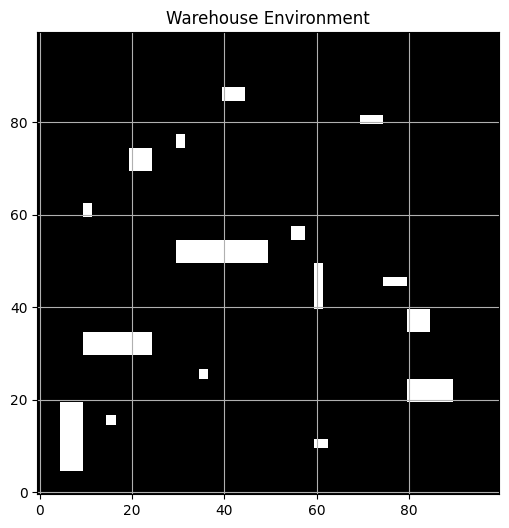

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a complicated warehouse environment using a binary occupancy grid
def complicated_warehouse_environment():
    gridSize = 100  # Grid size (100x100)
    map = np.zeros((gridSize, gridSize))  # Initialize grid with free space (0)

    # Add several large and small obstacles (1 = obstacle, 0 = free space)
    map[5:20, 5:10] = 1    # Obstacle 1 (Large Rack)
    map[30:35, 10:25] = 1  # Obstacle 2 (Small Rack)
    map[50:55, 30:50] = 1  # Obstacle 3 (Long Rack)
    map[70:75, 20:25] = 1  # Obstacle 4 (Medium Rack)
    map[40:50, 60:62] = 1  # Obstacle 5 (Narrow Rack)
    map[20:25, 80:90] = 1  # Obstacle 6 (Large Shelf)
    
    # Add scattered smaller obstacles simulating random objects
    map[10:12, 60:63] = 1  # Obstacle 7
    map[25:27, 35:37] = 1  # Obstacle 8
    map[60:63, 10:12] = 1  # Obstacle 9
    map[80:82, 70:75] = 1  # Obstacle 10
    map[45:47, 75:80] = 1  # Obstacle 11
    
    # Add more scattered obstacles
    map[15:17, 15:17] = 1  # Obstacle 12 (small block)
    map[55:58, 55:58] = 1  # Obstacle 13 (small block)
    map[75:78, 30:32] = 1  # Obstacle 14 (medium block)
    map[85:88, 40:45] = 1  # Obstacle 15 (irregular shape)
    map[35:40, 80:85] = 1  # Obstacle 16 (medium rack)

    # Display the environment
    plt.figure(figsize=(6, 6))
    plt.imshow(map, cmap="gray", origin="lower")
    plt.title('Warehouse Environment')
    plt.grid(True)
    plt.show()

# Call the function to display the environment
complicated_warehouse_environment()


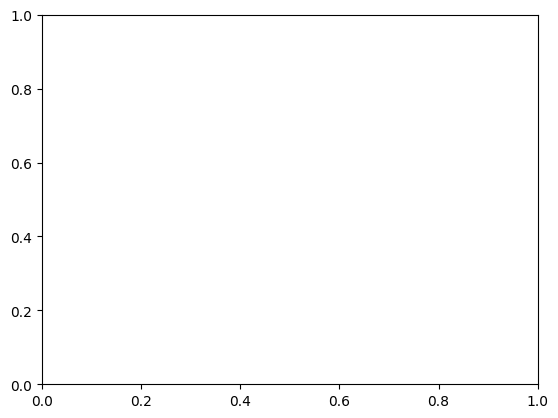

In [1]:
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import heapq
import random

# Warehouse environment
def create_warehouse_map():
    warehouse_map = np.zeros((20, 20))
    warehouse_map[5:10, 5] = 1  # Example obstacle
    warehouse_map[12:15, 8:12] = 1  # Another example obstacle
    return warehouse_map

# Dijkstra's Algorithm
def dijkstra(warehouse_map, start, goal):
    rows, cols = warehouse_map.shape
    queue = [(0, start)]
    costs = {start: 0}
    parents = {start: None}
    visited = set()

    while queue:
        cost, current = heapq.heappop(queue)

        if current in visited:
            continue
        visited.add(current)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = parents[current]
            return path[::-1]  # Reverse the path to get start to goal

        for delta_row, delta_col in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (current[0] + delta_row, current[1] + delta_col)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if warehouse_map[neighbor] == 0 and neighbor not in visited:
                    new_cost = cost + 1
                    if new_cost < costs.get(neighbor, float('inf')):
                        costs[neighbor] = new_cost
                        parents[neighbor] = current
                        heapq.heappush(queue, (new_cost, neighbor))

    return None  # No path found

# A* Algorithm
def astar(warehouse_map, start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    rows, cols = warehouse_map.shape
    queue = [(0, start)]
    costs = {start: 0}
    parents = {start: None}
    visited = set()

    while queue:
        _, current = heapq.heappop(queue)

        if current in visited:
            continue
        visited.add(current)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = parents[current]
            return path[::-1]

        for delta_row, delta_col in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (current[0] + delta_row, current[1] + delta_col)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if warehouse_map[neighbor] == 0 and neighbor not in visited:
                    new_cost = costs[current] + 1
                    priority = new_cost + heuristic(neighbor, goal)
                    if new_cost < costs.get(neighbor, float('inf')):
                        costs[neighbor] = new_cost
                        parents[neighbor] = current
                        heapq.heappush(queue, (priority, neighbor))

    return None  # No path found

# RRT (Rapidly-exploring Random Tree) Algorithm
def rrt(warehouse_map, start, goal, max_iter=1000):
    rows, cols = warehouse_map.shape
    nodes = {start: None}
    for _ in range(max_iter):
        rand_node = (random.randint(0, rows - 1), random.randint(0, cols - 1))
        nearest_node = min(nodes, key=lambda n: abs(n[0] - rand_node[0]) + abs(n[1] - rand_node[1]))
        
        if warehouse_map[rand_node] == 0:
            nodes[rand_node] = nearest_node
            if abs(rand_node[0] - goal[0]) + abs(rand_node[1] - goal[1]) < 2:
                nodes[goal] = rand_node
                break

    path = []
    current = goal
    while current:
        path.append(current)
        current = nodes[current]
    return path[::-1] if goal in nodes else None

# Modified A* (simple variation with different heuristic scaling)
def modified_astar(warehouse_map, start, goal):
    def heuristic(a, b):
        return 1.5 * (abs(a[0] - b[0]) + abs(a[1] - b[1]))

    rows, cols = warehouse_map.shape
    queue = [(0, start)]
    costs = {start: 0}
    parents = {start: None}
    visited = set()

    while queue:
        _, current = heapq.heappop(queue)

        if current in visited:
            continue
        visited.add(current)

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = parents[current]
            return path[::-1]

        for delta_row, delta_col in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (current[0] + delta_row, current[1] + delta_col)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if warehouse_map[neighbor] == 0 and neighbor not in visited:
                    new_cost = costs[current] + 1
                    priority = new_cost + heuristic(neighbor, goal)
                    if new_cost < costs.get(neighbor, float('inf')):
                        costs[neighbor] = new_cost
                        parents[neighbor] = current
                        heapq.heappush(queue, (priority, neighbor))

    return None  # No path found

# UI and Visualization
class PathPlanningApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Path Planning Simulator")

        # Create buttons for each algorithm
        self.dijkstra_button = tk.Button(root, text="Run Dijkstra", command=self.run_dijkstra)
        self.dijkstra_button.pack()

        self.astar_button = tk.Button(root, text="Run A*", command=self.run_astar)
        self.astar_button.pack()

        self.rrt_button = tk.Button(root, text="Run RRT", command=self.run_rrt)
        self.rrt_button.pack()

        self.modified_astar_button = tk.Button(root, text="Run Modified A*", command=self.run_modified_astar)
        self.modified_astar_button.pack()

        # Create matplotlib figure for plotting
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas.get_tk_widget().pack()

    def plot_warehouse(self, warehouse_map):
        self.ax.clear()
        self.ax.imshow(warehouse_map, cmap='gray_r')
        self.canvas.draw()

    def plot_path(self, path):
        if path:
            path = np.array(path)
            self.ax.plot(path[:, 1], path[:, 0], 'r')

    def run_dijkstra(self):
        warehouse_map = create_warehouse_map()
        start, goal = (0, 0), (19, 19)
        path = dijkstra(warehouse_map, start, goal)
        self.plot_warehouse(warehouse_map)
        self.plot_path(path)

    def run_astar(self):
        warehouse_map = create_warehouse_map()
        start, goal = (0, 0), (19, 19)
        path = astar(warehouse_map, start, goal)
        self.plot_warehouse(warehouse_map)
        self.plot_path(path)

    def run_rrt(self):
        warehouse_map = create_warehouse_map()
        start, goal = (0, 0), (19, 19)
        path = rrt(warehouse_map, start, goal)
        self.plot_warehouse(warehouse_map)
        self.plot_path(path)

    def run_modified_astar(self):
        warehouse_map = create_warehouse_map()
        start, goal = (0, 0), (19, 19)
        path = modified_astar(warehouse_map, start, goal)
        self.plot_warehouse(warehouse_map)
        self.plot_path(path)

# Create the main window and run the app
root = tk.Tk()
app = PathPlanningApp(root)
root.mainloop()
